In [1]:
import wget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_city = pd.read_json("city_geo_list_utf8.json")
city_name = df_city.columns.values.tolist()
print(city_name[:3], len(city_name))
lat, lng = df_city[:1].to_numpy()[0], df_city[1:2].to_numpy()[0]
similarity = np.zeros((len(city_name), len(city_name)))
print(similarity.shape)

# plt.scatter(index[0], index[1])
# plt.show()

['南充', '漳州', '清远'] 356
(356, 356)


In [10]:
df_city = pd.read_json("city_geo_list_utf8.json")
bsgsh = []
for city in ["北京", "上海", "深圳", "广州", "杭州"]:
    bsgsh.append(df_city.columns.get_loc(city))
bsgsh

[272, 213, 204, 233, 82]

In [3]:
def new_confirm(file_name1, file_name2):
    df1, df2 = pd.read_csv(file_name1), pd.read_csv(file_name2)
    df1 = df1[df1["cityName"].isin(city_name)].drop_duplicates(subset=["cityName"]).set_index(["cityName"])["city_confirmedCount"].to_dict()
    df2 = df2[df2["cityName"].isin(city_name)].drop_duplicates(subset=["cityName"]).set_index(["cityName"])["city_confirmedCount"].to_dict()
    sizes = np.array([df2[name] - df1[name] if name in df2.keys() and name in df1.keys() else 0 for name in city_name])
    return sizes

In [4]:
df1, df2 = pd.read_csv("DXYArea1.csv"), pd.read_csv("DXYArea2.csv")
df1 = df1[df1["cityName"].isin(city_name)].drop_duplicates(subset=["cityName"]).set_index(["cityName"])["city_confirmedCount"].to_dict()
df2 = df2[df2["cityName"].isin(city_name)].drop_duplicates(subset=["cityName"]).set_index(["cityName"])["city_confirmedCount"].to_dict()

In [2]:
pd.read_csv("DXYArea1.csv")[:20]

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
0,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,湛江,Zhanjiang,440800.0,318.0,2.0,142.0,0.0,2022-09-30 21:09:08
1,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,广州,Guangzhou,440100.0,3585.0,3.0,3476.0,1.0,2022-09-30 21:09:08
2,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,深圳,Shenzhen,440300.0,3769.0,3.0,3660.0,3.0,2022-09-30 21:09:08
3,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,佛山,Foshan,440600.0,483.0,1.0,415.0,0.0,2022-09-30 21:09:08
4,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,江门,Jiangmen,440700.0,176.0,0.0,113.0,0.0,2022-09-30 21:09:08
5,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,惠州,Huizhou,441300.0,167.0,0.0,113.0,0.0,2022-09-30 21:09:08
6,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,茂名,Maoming,440900.0,104.0,0.0,52.0,0.0,2022-09-30 21:09:08
7,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,珠海,Zhuhai,440400.0,479.0,2.0,436.0,1.0,2022-09-30 21:09:08
8,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,中山,Zhongshan,442000.0,166.0,0.0,155.0,0.0,2022-09-30 21:09:08
9,亚洲,Asia,中国,China,广东省,Guangdong,440000,10022,25.0,9768,8,肇庆,Zhaoqing,441200.0,66.0,1.0,54.0,1.0,2022-09-30 21:09:08


In [6]:
sizes = new_confirm("DXYArea1.csv", "DXYArea2.csv")

In [22]:
idx = np.array(np.where(sizes > 1))[0]
si = np.expand_dims(sizes[idx], axis=-1)
n = si.shape[0]
si = 1 - (np.square(si - si.T)) / (si + si.T)
si[np.eye(n, dtype=np.bool_)] = 0
idx_mask = np.where(si > 0.2)
edge = np.array([idx[idx_mask[0]], idx[idx_mask[1]]]).T
print(edge.shape)
print(edge)

(2038, 2)
[[  2  14]
 [  2  16]
 [  2  18]
 ...
 [354 306]
 [354 310]
 [354 326]]


In [227]:
# for i in range(len(si)):
#     for j in range(len(si[0])):
#         new_i, newj = idx[i], idx[j]
#         similarity[new_i][newj] = si[i][j]

# similarity.shape

(356, 356)

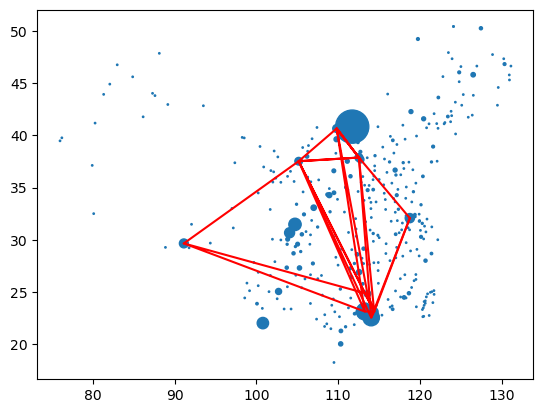

In [9]:
plt.plot(lat[edge], lng[edge], color='r')
plt.scatter(lat, lng, sizes+1)
plt.show()

In [20]:
bsgsh_edge = []
for e in edge:
    if e[0] in bsgsh and e[1] in bsgsh:
        bsgsh_edge.append(e)
bsgsh_edge = np.array(bsgsh_edge)
bsgsh_edge.shape

(2, 2)

In [34]:
n = len(bsgsh)
bsgsh_edge = []
for i in range(n):
    for j in range(i + 1, n):
        bsgsh_edge.append(np.array([bsgsh[i], bsgsh[j]]))
bsgsh_edge = np.array(bsgsh_edge)
bsgsh_edge

array([[272, 213],
       [272, 204],
       [272, 233],
       [272,  82],
       [213, 204],
       [213, 233],
       [213,  82],
       [204, 233],
       [204,  82],
       [233,  82]])

In [36]:
lng[bsgsh_edge]

array([[39.9 , 31.23],
       [39.9 , 22.55],
       [39.9 , 23.13],
       [39.9 , 30.28],
       [31.23, 22.55],
       [31.23, 23.13],
       [31.23, 30.28],
       [22.55, 23.13],
       [22.55, 30.28],
       [23.13, 30.28]])